# Statistiques descriptives

### Import des packages utilisés

les packages n'étaient pas installés
``` python
!pip install pandas fiona shapely pyproj rtree 
!pip install contextily
!pip install geopandas
```

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

On utilise cartiflette pour visualiser l'ensemble des données sur une carte de France.
```python
!pip install requests py7zr geopandas openpyxl tqdm s3fs PyYAML xlrd
!pip install git+https://github.com/inseefrlab/cartogether
```


In [90]:
import cartiflette.s3

from cartiflette.download import get_vectorfile_ign

dep = get_vectorfile_ign(
  level = "DEPARTEMENT",
  source = "COG", provider="opendatarchives")
dep

http://files.opendatarchives.fr/professionnels.ign.fr/adminexpress/ADMIN-EXPRESS-COG_3-1__SHP__FRA_L93_2022-04-15.7z
Data have been previously downloaded and are still available in C:\Users\kilia\AppData\Local\Temp/COG-2022


,ID,NOM_M,NOM,INSEE_DEP,INSEE_REG,geometry
0,DEPARTEM_FXX_00000000001,AIN,Ain,01,84,"POLYGON ((838383.200 6570485.800, 838483.800 6..."
1,DEPARTEM_FXX_00000000002,AISNE,Aisne,02,32,"POLYGON ((708719.000 6956305.000, 708718.700 6..."
2,DEPARTEM_FXX_00000000003,CORSE-DU-SUD,Corse-du-Sud,2A,94,"MULTIPOLYGON (((1165315.300 6103089.200, 11653..."
3,DEPARTEM_FXX_00000000004,HAUTE-CORSE,Haute-Corse,2B,94,"MULTIPOLYGON (((1222168.900 6235253.100, 12221..."
4,DEPARTEM_FXX_00000000005,ALLIER,Allier,03,84,"POLYGON ((664478.800 6602292.500, 664503.600 6..."
...,...,...,...,...,...,...
91,DEPARTEM_FXX_00000000092,ESSONNE,Essonne,91,11,"POLYGON ((629444.100 6836670.800, 629365.600 6..."
92,DEPARTEM_FXX_00000000093,HAUTS-DE-SEINE,Hauts-de-Seine,92,11,"POLYGON ((642868.900 6869240.500, 642874.900 6..."
93,DEPARTEM_FXX_00000000094,SEINE-SAINT-DENIS,Seine-Saint-Denis,93,11,"POLYGON ((660415.900 6872923.300, 660423.700 6..."
94,DEPARTEM_FXX_00000000095,VAL-DE-MARNE,Val-de-Marne,94,11,"POLYGON ((650731.000 6857288.700, 650942.200 6..."


In [91]:
dep.dtypes

ID             object
NOM_M          object
NOM            object
INSEE_DEP      object
INSEE_REG      object
geometry     geometry
dtype: object

In [92]:
france_dep = dep.dissolve()

Downloading: : 8.98MiB [00:00, 16.6MiB/s]
Downloading: : 11.3MiB [00:07, 1.61MiB/s]
Downloading: : 11.7MiB [00:00, 17.8MiB/s]
Downloading: : 10.8MiB [00:08, 1.37MiB/s]
Downloading: : 12.3MiB [00:03, 4.13MiB/s]
Downloading: : 8.14MiB [00:00, 13.5MiB/s]
Downloading: : 7.68MiB [00:01, 7.46MiB/s]
Downloading: : 8.16MiB [00:00, 22.4MiB/s]
Downloading: : 16.6MiB [00:00, 19.7MiB/s]
Downloading: : 8.60MiB [00:00, 19.9MiB/s]
Downloading: : 10.0MiB [00:01, 6.74MiB/s]
Downloading: : 8.73MiB [00:06, 1.39MiB/s]
Downloading: : 11.9MiB [00:05, 2.30MiB/s]
Downloading: : 18.9MiB [00:21, 927kiB/s] 
Downloading: : 6.80MiB [00:01, 5.89MiB/s]
Downloading: : 14.3MiB [00:01, 12.0MiB/s]
Downloading: : 11.5MiB [00:01, 6.73MiB/s]
Downloading: : 11.9MiB [00:01, 10.9MiB/s]
Downloading: : 17.7MiB [00:00, 19.7MiB/s]
Downloading: : 7.81MiB [00:00, 18.3MiB/s]
Downloading: : 13.5MiB [00:00, 28.8MiB/s]
Downloading: : 17.2MiB [00:07, 2.54MiB/s]
Downloading: : 24.6MiB [00:12, 2.03MiB/s]
Downloading: : 11.1MiB [00:07, 1.5

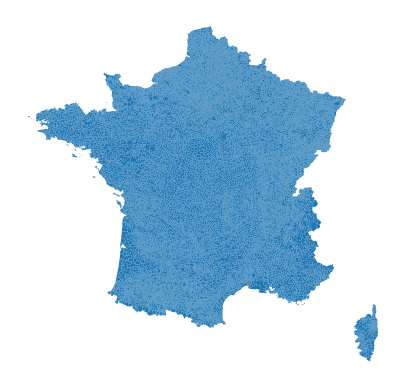

In [93]:
# Téléchargement un peu long
comm = cartiflette.s3.download_vectorfile_url_all(
    values = list(dep["INSEE_DEP"]),
    level="COMMUNE_ARRONDISSEMENT",
    vectorfile_format="geojson",
    decoupage="departement",
    year=2022)


ax = comm.plot()
ax.set_axis_off()

In [94]:
comm

,ID,NOM,NOM_M,INSEE_COM,STATUT,POPULATION,INSEE_CAN,INSEE_ARR,INSEE_DEP,INSEE_REG,SIREN_EPCI,INSEE_ARM,INSEE_COG,geometry
0,COMMUNE_0000000009749108,Saint-Nizier-le-Bouchoux,SAINT-NIZIER-LE-BOUCHOUX,01380,Commune simple,632,17,2,01,84,200071751,None,01380,"POLYGON ((5.13119 46.43241, 5.12969 46.43359, ..."
1,COMMUNE_0000000009749110,Lescheroux,LESCHEROUX,01212,Commune simple,718,17,2,01,84,200071751,None,01212,"POLYGON ((5.18675 46.41449, 5.18664 46.41448, ..."
2,COMMUNE_0000000009751205,Pizay,PIZAY,01297,Commune simple,867,12,2,01,84,240100610,None,01297,"POLYGON ((5.11034 45.88992, 5.11028 45.88991, ..."
3,COMMUNE_0000000009751466,Bressolles,BRESSOLLES,01062,Commune simple,934,12,2,01,84,240100610,None,01062,"POLYGON ((5.07969 45.86298, 5.07974 45.86300, ..."
4,COMMUNE_0000002200276459,Valromey-sur-Séran,VALROMEY-SUR-SERAN,01036,Commune simple,1326,10,1,01,84,200040350,None,01036,"POLYGON ((5.66760 45.91133, 5.66727 45.91112, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,COMMUNE_0000000009733989,Beaumont-sur-Oise,BEAUMONT-SUR-OISE,95052,Commune simple,9504,14,3,95,11,249500489,None,95052,"POLYGON ((2.32006 49.12486, 2.31987 49.12481, ..."
180,COMMUNE_0000000009734027,Omerville,OMERVILLE,95462,Commune simple,323,20,3,95,11,249500513,None,95462,"POLYGON ((1.74171 49.13790, 1.74170 49.13777, ..."
181,COMMUNE_0000000009735023,Margency,MARGENCY,95369,Commune simple,2846,15,2,95,11,200056380,None,95369,"POLYGON ((2.29014 48.99680, 2.28979 48.99688, ..."
182,COMMUNE_0000000009735013,Le Thillay,LE THILLAY,95612,Commune simple,4567,21,2,95,11,200055655,None,95612,"POLYGON ((2.44338 49.01131, 2.44344 49.01137, ..."


In [95]:
france_comm = comm.dissolve()

### Import des données

In [96]:
data = pd.read_csv(filepath_or_buffer='Données élections et INSEE.csv', encoding='l5', sep=',')

C:\Users\kilia\AppData\Local\Temp\ipykernel_7040\52252013.py:1: DtypeWarning: Columns (1,1557,1558,1559) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filepath_or_buffer='Données élections et INSEE.csv', encoding='l5', sep=',')


In [97]:
data

,Unnamed: 0,CODGEO,P19_POP,P19_POP0014,P19_POP1529,P19_POP3044,P19_POP4559,P19_POP6074,P19_POP7589,P19_POP90P,...,RT22,RTUH22,RTLIT22,AJCS22,AJCSUH22,AJCSLIT22,Nom de l'Ã©lu en 2020,Nom de l'Ã©lu en 2014,LibellÃ© de la commune,Tentative de rÃ©Ã©lection
0,0,1001,779.0,158.508629,102.468339,131.523972,194.112147,131.050309,56.014471,5.322133,...,0.0,0.0,0.0,0.0,0.0,0.0,BOULON,BOULON,L'Abergement-ClÃ©menciat,True
1,1,1002,256.0,58.646351,29.609476,74.028483,38.684019,35.381928,17.582020,2.067723,...,0.0,0.0,0.0,0.0,0.0,0.0,ORSET,ORSET,L'Abergement-de-Varey,True
2,2,1004,14134.0,2642.167045,3076.783602,2730.398468,2391.347109,2054.139468,1044.007592,195.156716,...,1.0,16.0,16.0,0.0,0.0,0.0,FABRE,FABRE,AmbÃ©rieu-en-Bugey,True
3,3,1005,1751.0,346.859147,268.250842,362.580808,380.267677,272.181257,111.034231,9.826038,...,0.0,0.0,0.0,0.0,0.0,0.0,PERNET,PERNET,AmbÃ©rieux-en-Dombes,True
4,4,1006,112.0,12.218182,16.290909,15.272727,29.527273,27.490909,10.181818,1.018182,...,0.0,0.0,0.0,0.0,0.0,0.0,BIONDA,BIONDA,AmblÃ©on,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27174,27174,97417,5198.0,1041.708722,894.098174,933.109533,1235.711156,776.009736,294.166734,23.195943,...,0.0,0.0,0.0,0.0,0.0,0.0,RIVIERE,RIVIERE,Saint-Philippe,True
27175,27175,97421,7136.0,1711.000000,1321.000000,1289.000000,1575.000000,858.000000,354.000000,28.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,FOUASSIN,FOUASSIN,Salazie,True
27176,27176,97422,79824.0,17965.710576,16081.862311,14636.246671,16582.101722,10535.209215,3678.636613,344.232891,...,0.0,0.0,0.0,0.0,0.0,0.0,THIEN AH KOON,THIEN AH KOON,Le Tampon,True
27177,27177,97423,7015.0,1389.693054,1286.152394,1284.135423,1708.032693,947.626169,349.944477,49.415791,...,0.0,0.0,0.0,0.0,0.0,0.0,PAUSE,PAUSE,Les Trois-Bassins,True


Création d'une colonne avec le numéro de département

In [98]:
data.dtypes

Unnamed: 0                     int64
CODGEO                        object
P19_POP                      float64
P19_POP0014                  float64
P19_POP1529                  float64
                              ...   
AJCSLIT22                    float64
Nom de l'Ã©lu en 2020         object
Nom de l'Ã©lu en 2014         object
LibellÃ© de la commune        object
Tentative de rÃ©Ã©lection     object
Length: 1915, dtype: object

On a besoin de convertir le dtype de la colonne CODGEO avant de procéder au slicing.

In [99]:
ds = data["CODGEO"].astype(str)
data["depart"] = ds.str.slice(stop=-3)
print(data["depart"])

0         1
1         1
2         1
3         1
4         1
         ..
27174    97
27175    97
27176    97
27177    97
27178    97
Name: depart, Length: 27179, dtype: object


On rajoute un '0' devant les départements n'ayant qu'un seul chiffre

In [100]:
for x in range (1,10):
    data["depart"][data["depart"]== str(x)] = '0' + str(x)
data["depart"]

C:\Users\kilia\AppData\Local\Temp\ipykernel_7040\3526128663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["depart"][data["depart"]== str(x)] = '0' + str(x)


0        01
1        01
2        01
3        01
4        01
         ..
27174    97
27175    97
27176    97
27177    97
27178    97
Name: depart, Length: 27179, dtype: object

On rajoute une colonne binaire qui vaut True si  la commune a plus de 1000 habitants et False sinon

In [101]:
data["1000_hab_19"] = np.where(data["P19_POP"] >= 1000, True, False)
data["1000_hab_13"] = np.where(data["P13_POP"] >= 1000, True, False)                      

On rajoute un "0" devant les codes geo pour qu'ils correspondent avec ceux de la table cartiflette

In [104]:
data["INSEE_COG"] = ds
data["INSEE_COG"][data["INSEE_COG"].str.len() == 4] = "0" + data["INSEE_COG"]  
data["INSEE_COG"]                   

C:\Users\kilia\AppData\Local\Temp\ipykernel_7040\981108673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["INSEE_COG"][data["INSEE_COG"].str.len() == 4] = "0" + data["INSEE_COG"]


0        01001
1        01002
2        01004
3        01005
4        01006
         ...  
27174    97417
27175    97421
27176    97422
27177    97423
27178    97424
Name: INSEE_COG, Length: 27179, dtype: object

### Données sur les maires

#### Communes pour lesquelles les maires ont tenté d'être réélus

Tentative de réélection du maire pour toutes les communes étudiées.

In [130]:
data_tentatives = data[["INSEE_COG","Tentative de rÃ©Ã©lection","1000_hab_19","1000_hab_13"]]
TENTATIVES = gpd.GeoDataFrame(data_tentatives.merge(comm, how= 'right', on = "INSEE_COG"))
dupl = data["CODGEO"][data["CODGEO"].duplicated()]
data[data["CODGEO"].duplicated()]

,Unnamed: 0,CODGEO,P19_POP,P19_POP0014,P19_POP1529,P19_POP3044,P19_POP4559,P19_POP6074,P19_POP7589,P19_POP90P,...,AJCSLIT22,Nom de l'Ã©lu en 2020,Nom de l'Ã©lu en 2014,LibellÃ© de la commune,Tentative de rÃ©Ã©lection,depart,1000_hab_19,1000_hab_13,INSEE_COG_num,INSEE_COG
10,10,1011,368.0,82.769628,42.756487,72.492032,76.233012,77.674339,15.043023,1.031479,...,0.0,DAGNIAUX,DAGNIAUX,Apremont,True,01,False,False,1011,01011
11,11,1011,368.0,82.769628,42.756487,72.492032,76.233012,77.674339,15.043023,1.031479,...,0.0,CHAUDOT,PERCHET,Apremont,Ville <1000,01,False,False,1011,01011
12,12,1011,368.0,82.769628,42.756487,72.492032,76.233012,77.674339,15.043023,1.031479,...,0.0,DUPRAZ,DUPRAZ,Apremont,True,01,False,False,1011,01011
13,13,1011,368.0,82.769628,42.756487,72.492032,76.233012,77.674339,15.043023,1.031479,...,0.0,CHAMPION,JOLLY,Apremont,False,01,False,False,1011,01011
24,24,1027,2563.0,497.698288,863.127610,500.809843,382.041072,244.909939,71.347675,3.065573,...,0.0,COLLINET,DROUARD,Balan,False,01,True,True,1027,01027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26321,26321,88435,518.0,97.839924,61.448769,82.294980,118.254728,116.538177,37.549010,4.074412,...,0.0,GEORGE,GEORGE,Saint-Remy,True,88,False,False,88435,88435
26578,26578,89354,1525.0,273.000000,178.000000,251.000000,347.000000,355.000000,114.000000,7.000000,...,0.0,PICHERY,FERON,Saint-Martin-du-Tertre,False,89,True,True,89354,89354
26991,26991,95059,350.0,76.806806,45.629868,74.264193,80.815032,54.338705,18.145396,0.000000,...,0.0,JONCOUR,BAUDIN,Berville,Ville <1000,95,False,False,95059,95059
26995,26995,95074,818.0,161.686550,127.244444,148.292398,212.392982,126.287719,40.182456,1.913450,...,0.0,SAVILL,WANNER,Boisemont,Ville <1000,95,False,False,95074,95074


In [ ]:
fig,ax = plt.subplots(figsize=(10, 10))
TENTATIVES.plot(ax = ax ,column = "Tentative de rÃ©Ã©lection", legend = True)
france_comm.plot(ax = ax, zorder=1, edgecolor = "black", facecolor="none", color = None)
ax.set_axis_off()

In [88]:
data["LibellÃ© de la commune"][data["CODGEO"] == "29019"]

Series([], Name: LibellÃ© de la commune, dtype: object)

### Données socio-démographiques (INSEE)

#### Nombre de communes par département

Nombre de communes étudiées par département en 2019

In [16]:
departements = list(dep["INSEE_DEP"])
nb_communes = []
for x in departements:
    nb_communes.append(data["P19_POP"][data["depart"]==x].count())
NB_C = pd.DataFrame({"INSEE_DEP":departements ,
                   'NB_COMMUNES':nb_communes })
dep_nbcomm = gpd.GeoDataFrame(pd.merge(dep, NB_C, on = "INSEE_DEP"))

pd.DataFrame(dep_nbcomm)[["NOM","NB_COMMUNES"]]

,NOM,NB_COMMUNES
0,Ain,402
1,Aisne,817
2,Corse-du-Sud,117
3,Haute-Corse,221
4,Allier,359
...,...,...
91,Essonne,143
92,Hauts-de-Seine,24
93,Seine-Saint-Denis,33
94,Val-de-Marne,40


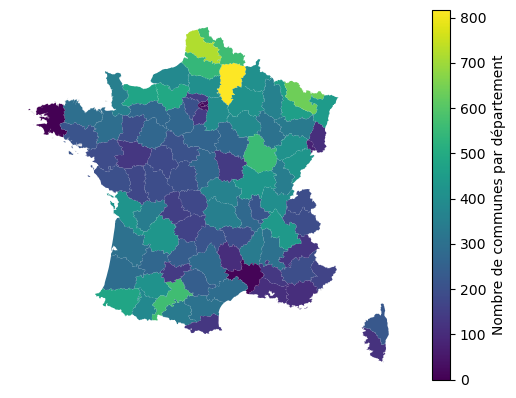

In [17]:
ax = dep_nbcomm.plot(column = 'NB_COMMUNES', legend = True, legend_kwds={'label': "Nombre de communes par département"})
ax.set_axis_off()

Nombre de communes de moins de 1000 habitants étudiées par département en 2019

In [28]:
nb_communes = []
for x in departements:
    nb_communes.append(data["P19_POP"][(data["depart"]==x) & (data["1000_hab_19"] == False) ].count())
NB_C = pd.DataFrame({"INSEE_DEP":departements ,
                   'NB_COMMUNES':nb_communes })
dep_nbcomm = gpd.GeoDataFrame(pd.merge(dep, NB_C, on = "INSEE_DEP"))

pd.DataFrame(dep_nbcomm)[["NOM","NB_COMMUNES"]]

,NOM,NB_COMMUNES
0,Ain,213
1,Aisne,711
2,Corse-du-Sud,92
3,Haute-Corse,193
4,Allier,282
...,...,...
91,Essonne,52
92,Hauts-de-Seine,0
93,Seine-Saint-Denis,0
94,Val-de-Marne,0


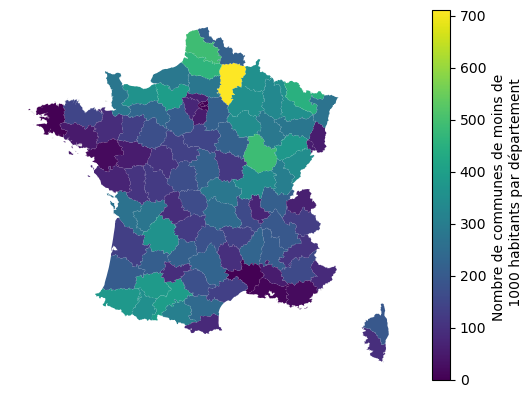

In [31]:
ax = dep_nbcomm.plot(column = 'NB_COMMUNES', legend = True, legend_kwds={'label': "Nombre de communes de moins de \n 1000 habitants par département"})
ax.set_axis_off()

Nombre de communes de plus de 1000 habitants étudiées par département en 2019

In [33]:
nb_communes = []
for x in departements:
    nb_communes.append(data["P19_POP"][(data["depart"]==x) & (data["1000_hab_19"] == True) ].count())
NB_C = pd.DataFrame({"INSEE_DEP":departements ,
                   'NB_COMMUNES':nb_communes })
dep_nbcomm = gpd.GeoDataFrame(pd.merge(dep, NB_C, on = "INSEE_DEP"))

pd.DataFrame(dep_nbcomm)[["NOM","NB_COMMUNES"]]

,NOM,NB_COMMUNES
0,Ain,189
1,Aisne,106
2,Corse-du-Sud,25
3,Haute-Corse,28
4,Allier,77
...,...,...
91,Essonne,91
92,Hauts-de-Seine,24
93,Seine-Saint-Denis,33
94,Val-de-Marne,40


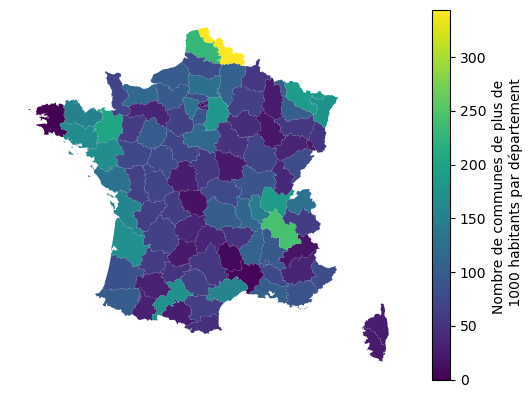

In [34]:
ax = dep_nbcomm.plot(column = 'NB_COMMUNES', legend = True, legend_kwds={'label': "Nombre de communes de plus de \n 1000 habitants par département"})
ax.set_axis_off()